Come up with 5 questions that you want to answer while exploring dataset, and Perform EDA (Exploratory Data Analysis and Visualization) on your dataset with basic visualizations (using Pandas, NumPy, Matplotlib, Seaborn, Plotly or similar packages)

Install Kaggle and import necessary Libraries

In [ ]:
import os

os.environ["KAGGLE_USERNAME"] = "azanazam"
os.environ["KAGGLE_KEY"] = "88d5c8135f6deb3820f2660a09ada381"
# Install necessary packages and download the dataset
!pip install pandas numpy matplotlib seaborn opencv-python
!kaggle datasets download -d andrewmvd/medical-mnist

# Unzip the dataset
import zipfile
with zipfile.ZipFile("medical-mnist.zip", "r") as zip_ref:
    zip_ref.extractall("medical-mnist-dataset")

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from collections import Counter

 81% 69.0M/84.8M [00:00<00:00, 189MB/s]
100% 84.8M/84.8M [00:00<00:00, 180MB/s]


Importing dataset

In [ ]:
# Define the path to the dataset
data_dir = "medical-mnist-dataset"

# List the classes in the dataset
classes = os.listdir(data_dir)

# Create a dictionary to store the count of each class
class_count = {c: len(os.listdir(os.path.join(data_dir, c))) for c in classes}

Question 1: What is the distribution of different classes in the dataset?

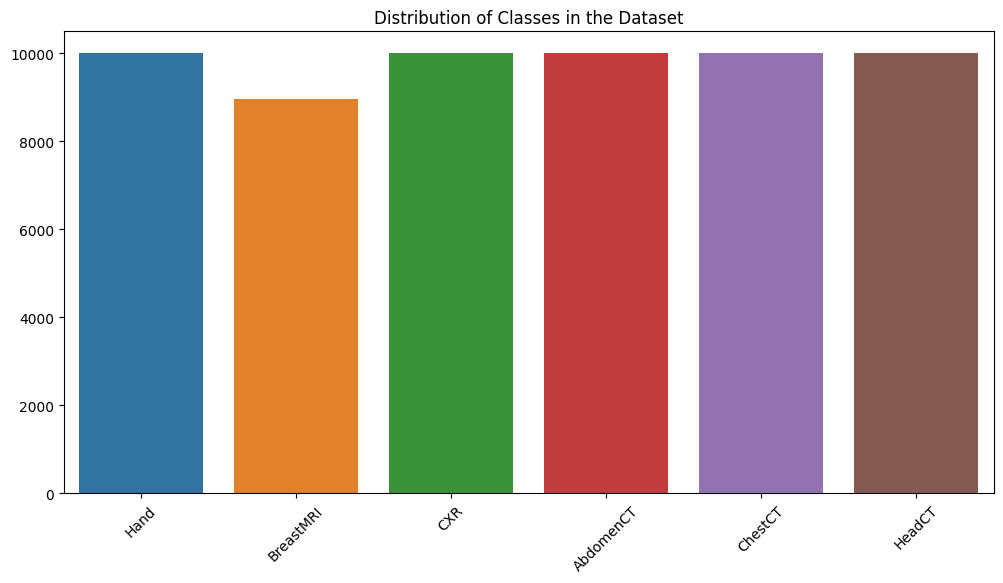

In [ ]:
#Question 1: What is the distribution of different classes in the dataset?
plt.figure(figsize=(12, 6))
sns.barplot(x=list(class_count.keys()), y=list(class_count.values()))
plt.title("Distribution of Classes in the Dataset")
plt.xticks(rotation=45)
plt.show()

Question 2: Are there any class imbalances in the dataset?

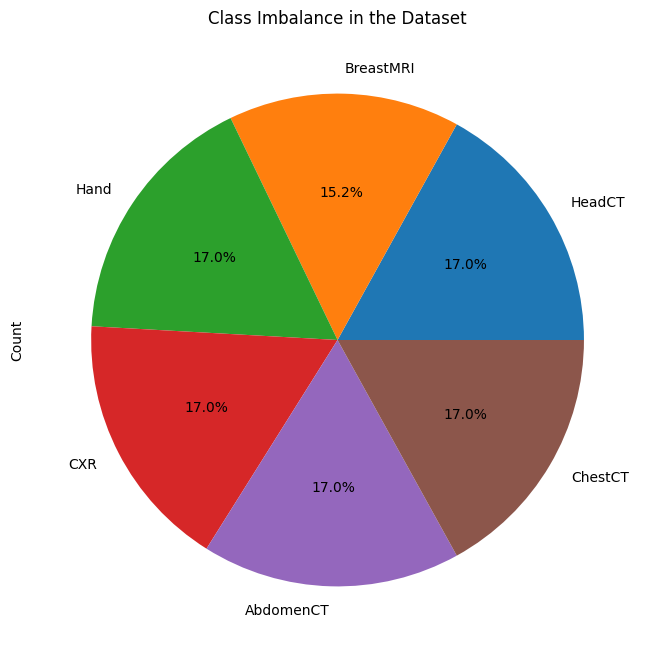

In [ ]:
# Question 2: Are there any class imbalances in the dataset?
class_count_df = pd.DataFrame.from_dict(class_count, orient="index", columns=["Count"])
class_count_df.plot.pie(y="Count", autopct='%1.1f%%', figsize=(8, 8), legend=False)
plt.title("Class Imbalance in the Dataset")
plt.show()

Question 3: What is the average image size, and are there variations in image dimensions?

In [ ]:
# Question 3: What is the average image size, and are there variations in image dimensions?
image_sizes = []
for c in classes:
    for image_name in os.listdir(os.path.join(data_dir, c)):
        img = cv2.imread(os.path.join(data_dir, c, image_name))
        image_sizes.append(img.shape)

image_sizes = np.array(image_sizes)
average_size = np.mean(image_sizes, axis=0)
std_size = np.std(image_sizes, axis=0)
print(f"Average Image Size: {average_size}, Standard Deviation: {std_size}")

Average Image Size: [64. 64.  3.], Standard Deviation: [0. 0. 0.]


Question 4: Visualize sample images from different classes



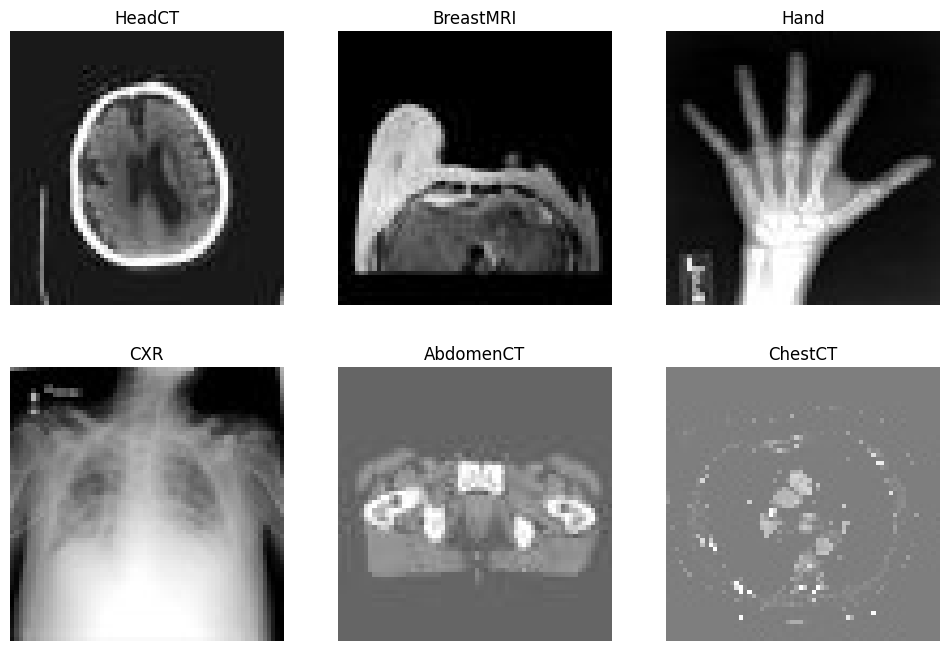

In [ ]:
#Question 4: Visualize sample images from different classes
plt.figure(figsize=(12, 8))
for i, c in enumerate(classes):
    img_path = os.path.join(data_dir, c, os.listdir(os.path.join(data_dir, c))[0])
    img = cv2.imread(img_path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(c)
    plt.axis('off')
plt.show()

Question 5 Calculating and visualizing the average pixel values within the same class

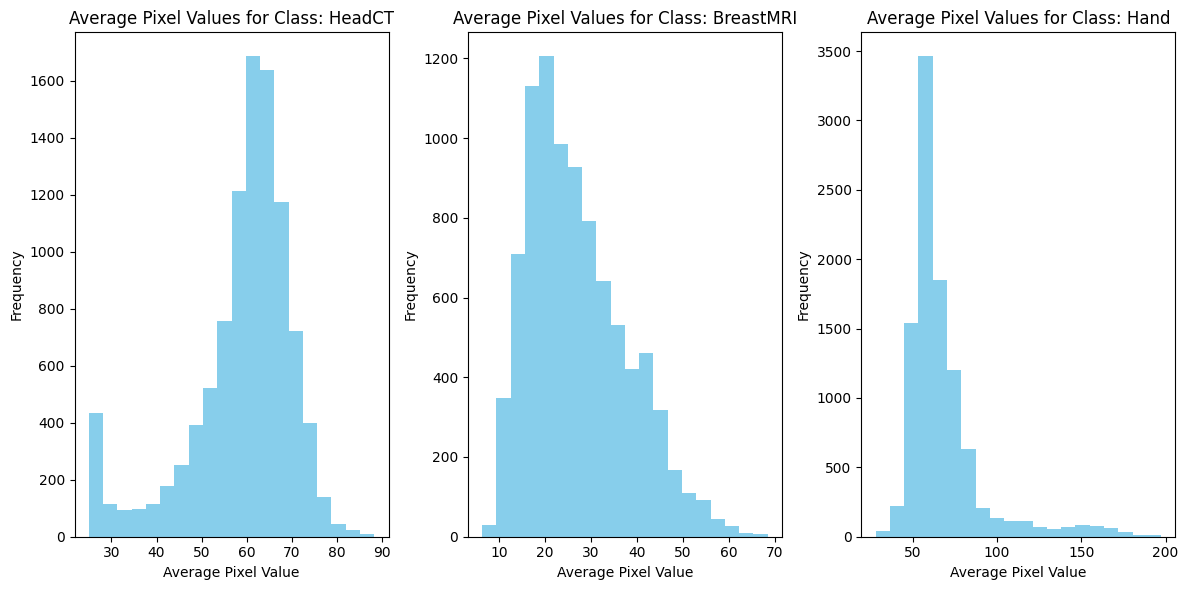

In [ ]:
#Question 5 Calculating and visualizing the average pixel values within the same class

# Define a function to calculate the average pixel values for a class
def calculate_average_pixel_values(class_dir):
    image_paths = os.listdir(class_dir)
    average_pixels = []

    for image_path in image_paths:
        img = cv2.imread(os.path.join(class_dir, image_path))
        average_pixel_value = np.mean(img)
        average_pixels.append(average_pixel_value)

    return average_pixels

# Visualize the average pixel values for a few sample classes
sample_classes = classes[:3]  # You can choose a few classes to visualize

plt.figure(figsize=(12, 6))
for i, c in enumerate(sample_classes):
    class_dir = os.path.join(data_dir, c)
    average_pixels = calculate_average_pixel_values(class_dir)
    plt.subplot(1, len(sample_classes), i + 1)
    plt.hist(average_pixels, bins=20, color='skyblue')
    plt.title(f"Average Pixel Values for Class: {c}")
    plt.xlabel("Average Pixel Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Perform Classification (Predictive Analytics) on your dataset to detect and predict different classes (using Scikit-learn, Keras, Pytorch or similar packages)

In [ ]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Define the path to the dataset
data_dir = "medical-mnist-dataset"

# Define a list of classes (folder names)
classes = os.listdir(data_dir)

# Initialize lists to store image data and labels
data = []
labels = []

# Load and preprocess the dataset
for i, c in enumerate(classes):
    class_dir = os.path.join(data_dir, c)
    for image_name in os.listdir(class_dir):
        img = cv2.imread(os.path.join(class_dir, image_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img = cv2.resize(img, (128, 128))  # Resize to a consistent size
        data.append(img)
        labels.append(i)

# Convert data and labels to NumPy arrays
data = np.array(data) / 255.0  # Normalize pixel values to the range [0, 1]
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Define a simple CNN model
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(classes), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Save the model for future use
model.save("medical_mnist_model.h5")